In [1]:
from src.models.decisiontrees.xgboost import XGB1
from src.models.decisiontrees.catboost import CatBoost1
from src.models.decisiontrees.lightgbm import LGBM1
from utils import get_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
len_week =24*7

In [3]:
X,y,times = get_data('ES',indices=[5],demand=[0]+[-len_week,-2*len_week,-3*len_week,-4*len_week]+[i for i in range(2200)]+[i for i in range(6300,6400 )])

hello
hello
hello
hello


/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:111: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:111: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:111: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

In [4]:
X_train = X[0][:len(X[0])*4//5]
y_train = y[0][:len(X[0])*4//5]
X_test = X[0][len(X[0])*4//5:]
y_test = y[0][len(X[0])*4//5:]
times_test = times[0][len(X[0])*4//5:]

In [5]:
times_test

18845   2024-02-25 07:00:00
18846   2024-02-25 08:00:00
18847   2024-02-25 09:00:00
18848   2024-02-25 10:00:00
18849   2024-02-25 11:00:00
                ...        
21952   2024-07-03 19:00:00
21953   2024-07-03 20:00:00
21954   2024-07-03 21:00:00
21955   2024-07-03 22:00:00
21956   2024-07-03 23:00:00
Name: DATETIME, Length: 3112, dtype: datetime64[ns]

In [6]:
model = XGB1()
model2 = CatBoost1(loss_function='MultiRMSE')
model3 = LGBM1()

In [7]:
# model.fit(X_train, y_train)
# model3.fit(X_train, y_train)
model2.fit(X_train, y_train)


0:	learn: 0.0150955	total: 489ms	remaining: 8m 8s
1:	learn: 0.0147854	total: 797ms	remaining: 6m 37s
2:	learn: 0.0144849	total: 1.01s	remaining: 5m 37s
3:	learn: 0.0142105	total: 1.2s	remaining: 4m 59s
4:	learn: 0.0139382	total: 1.37s	remaining: 4m 32s
5:	learn: 0.0136707	total: 1.54s	remaining: 4m 15s
6:	learn: 0.0134032	total: 1.69s	remaining: 4m
7:	learn: 0.0131567	total: 1.84s	remaining: 3m 48s
8:	learn: 0.0129177	total: 2.02s	remaining: 3m 42s
9:	learn: 0.0126951	total: 2.18s	remaining: 3m 36s
10:	learn: 0.0124750	total: 2.33s	remaining: 3m 29s
11:	learn: 0.0122642	total: 2.48s	remaining: 3m 24s
12:	learn: 0.0120524	total: 2.62s	remaining: 3m 18s
13:	learn: 0.0118535	total: 2.76s	remaining: 3m 14s
14:	learn: 0.0116499	total: 2.91s	remaining: 3m 10s
15:	learn: 0.0114603	total: 3.05s	remaining: 3m 7s
16:	learn: 0.0112702	total: 3.19s	remaining: 3m 4s
17:	learn: 0.0110958	total: 3.34s	remaining: 3m 2s
18:	learn: 0.0109272	total: 3.51s	remaining: 3m 1s
19:	learn: 0.0107594	total: 3.67

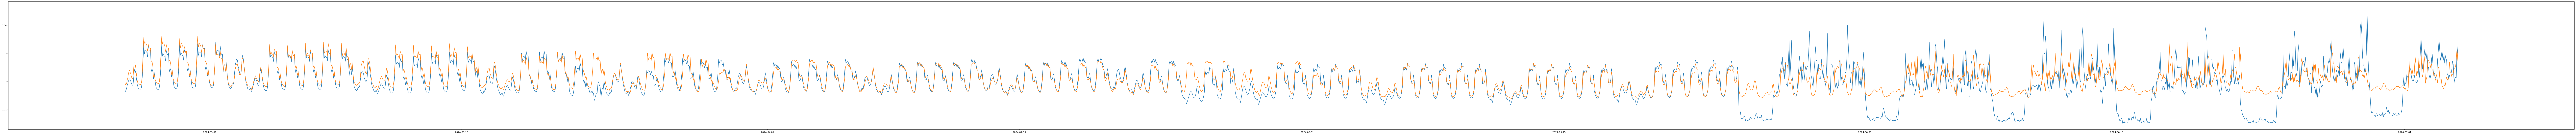

In [23]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,0], label='Real')
plt.plot(times_test, model2.predict(X_test)[:,0], label='CatBoost')

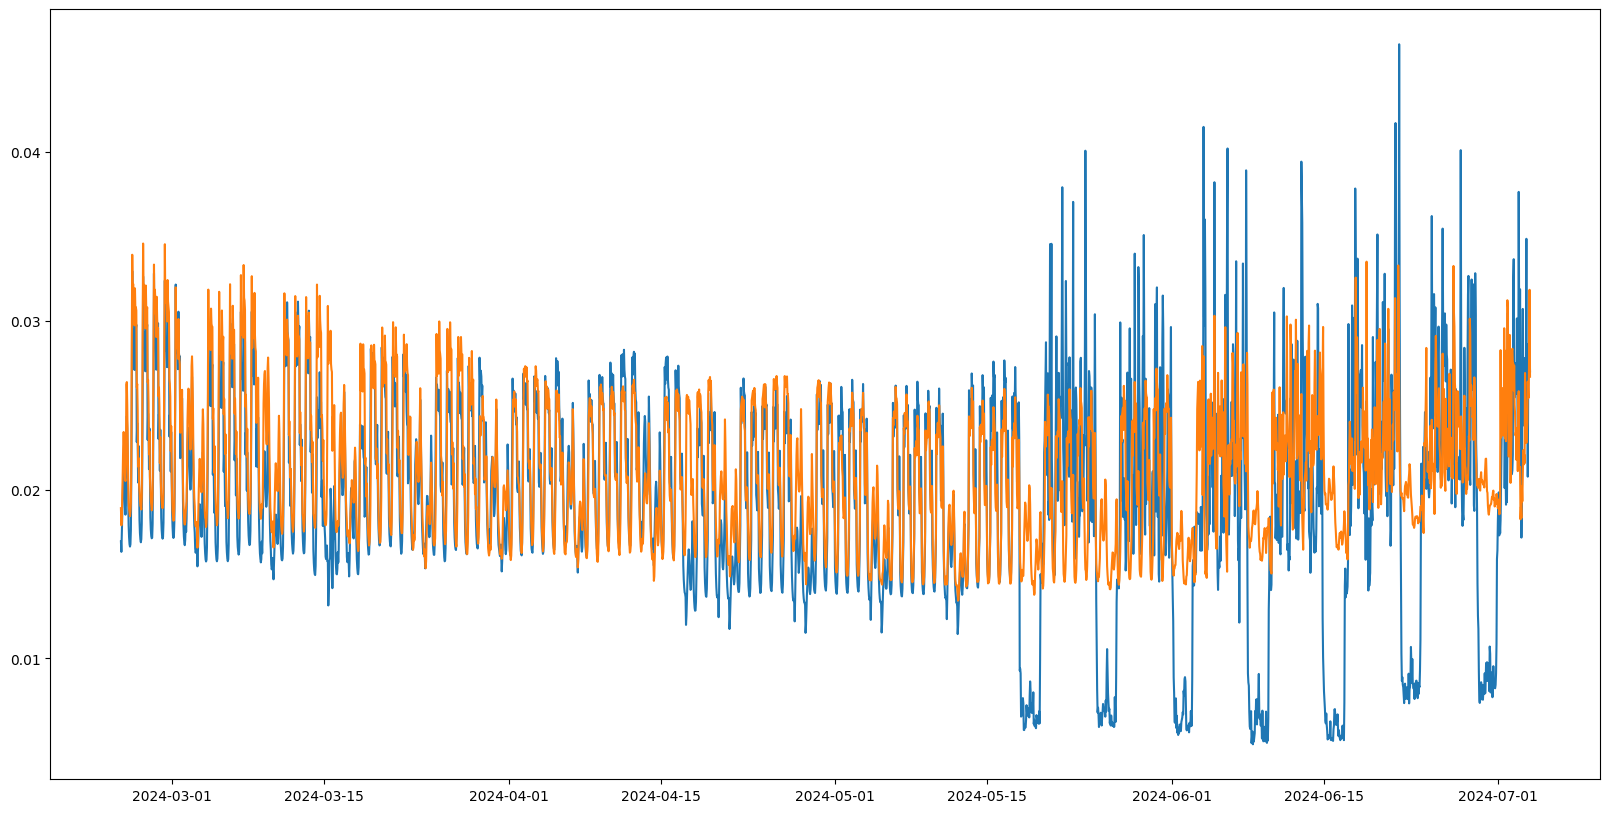

In [ ]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,1],label='Real')
plt.plot(times_test,model2.predict(X_test)[:,1], label='CatBoost')

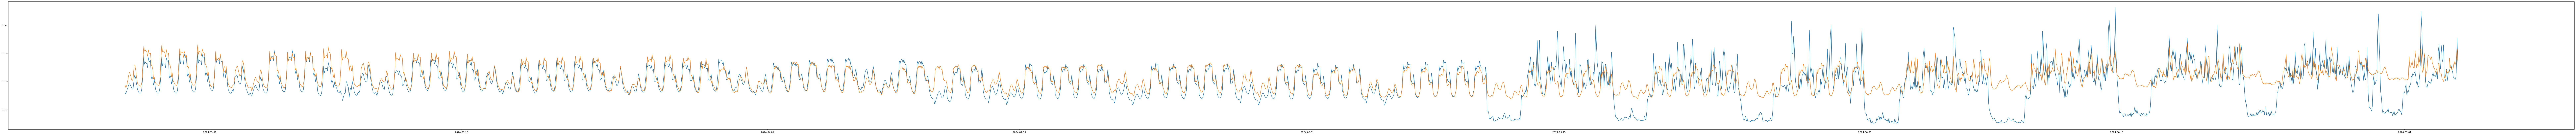

In [26]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,2],label='Real')
plt.plot(times_test,model2.predict(X_test)[:,2], label='CatBoost')

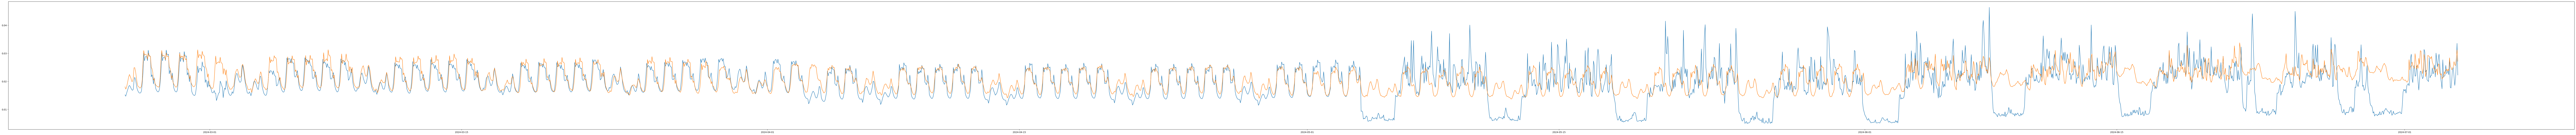

In [27]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,3],label='Real')
plt.plot(times_test,model2.predict(X_test)[:,3], label='CatBoost')